<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/Unit_5/Scraping/Scrapy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API Challenge
Unit 5 / Lesson 2 / Project 4

Do a little scraping or API-calling of your own. Pick a new website and see what you can get out of it. Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.

Formally, your goal is to write a scraper that will:

1. Return specific pieces of information (rather than just downloading a whole page)
2. Iterate over multiple pages/queries
3. Save the data to your computer

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest. Write up a report from scraping code to summary and share it with your mentor.

In [0]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Establish site for scraping
url = 'https://en.wikipedia.org/wiki/List_of_2019_box_office_number-one_films_in_the_United_States'
html = urlopen(url)

In [26]:
#Parse our html
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [27]:
trows = soup.find_all('tr')
print(trows[:5])

[<tr>
<th width="5%">#
</th>
<th width="15%">Date
</th>
<th width="30%">Film
</th>
<th width="15%">Gross
</th>
<th width="35%">Note(s)
</th></tr>, <tr>
<td>1</td>
<td><span data-sort-value="000000002019-01-06-0000" style="white-space:nowrap">January 6, 2019</span></td>
<td><i><a href="/wiki/Aquaman_(film)" title="Aquaman (film)">Aquaman</a></i></td>
<td>$31,003,280</td>
<td><i>Aquaman</i><span class="nowrap" style="padding-left:0.1em;">'</span>s worldwide gross ($940 million) surpassed <i><a href="/wiki/Batman_v_Superman:_Dawn_of_Justice" title="Batman v Superman: Dawn of Justice">Batman v Superman: Dawn of Justice</a></i> ($873.6 million) as the highest grossing film globally in the <a href="/wiki/DC_Extended_Universe" title="DC Extended Universe">DC Extended Universe</a>. Its international gross ($680 million) also surpassed <i><a href="/wiki/The_Dark_Knight_Rises" title="The Dark Knight Rises">The Dark Knight Rises</a></i><span class="nowrap" style="padding-left:0.1em;">'</span> ($6

In [28]:
#Print out each cell of each table row

for trow in trows:
    trow_td = trow.find_all('td')
print(trow_td)
type(trow_td)

[<td class="navbox-abovebelow" colspan="2"><div><img alt="Category" data-file-height="31" data-file-width="36" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/en/thumb/4/48/Folder_Hexagonal_Icon.svg/16px-Folder_Hexagonal_Icon.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/48/Folder_Hexagonal_Icon.svg/24px-Folder_Hexagonal_Icon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/48/Folder_Hexagonal_Icon.svg/32px-Folder_Hexagonal_Icon.svg.png 2x" title="Category" width="16"/> <b><a href="/wiki/Category:Lists_of_box_office_number-one_films" title="Category:Lists of box office number-one films">Category</a></b></div></td>]


bs4.element.ResultSet

In [29]:
#Get text from each tr and td
list_trows = []

for trow in trows:
    cells = trow.find_all('td')
    str_cells = str(cells)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    list_trows.append(cleantext)
print(list_trows)

['[]', "[1, January 6, 2019, Aquaman, $31,003,280, Aquaman's worldwide gross ($940 million) surpassed Batman v Superman: Dawn of Justice ($873.6 million) as the highest grossing film globally in the DC Extended Universe. Its international gross ($680 million) also surpassed The Dark Knight Rises' ($636.8 million) as the highest grossing international gross for a film based on a DC Comics property.\n]", '[2, January 13, 2019, The Upside, $20,355,000, Aquaman became the first film in the DC Extended Universe to gross $1 billion worldwide.\n]', '[3, January 20, 2019, Glass, $40,328,920, \n]', "[4, January 27, 2019, Glass, $18,884,440, During the weekend, Aquaman's worldwide total ($1.091 billion) surpassed The Dark Knight Rises ($1,084.9 billion) as the all-time highest-grossing film based on a DC Comics property.\n]", '[5, February 3, 2019, Glass, $9,548,795, Glass became the first film in 2019 to top the box office for three consecutive weekends.\n]', '[6, February 10, 2019, The Lego Mo

In [81]:
#Create dataframe from output

df = pd.DataFrame(list_trows)
df.head(5)

,0
0,[]
1,"[1, January 6, 2019, Aquaman, $31,003,280, Aqu..."
2,"[2, January 13, 2019, The Upside, $20,355,000,..."
3,"[3, January 20, 2019, Glass, $40,328,920, \n]"
4,"[4, January 27, 2019, Glass, $18,884,440, Duri..."


In [82]:
#split data on ',' 

df = df[0].str.split(',', expand=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[1,January 6,2019,Aquaman,$31,003,280,Aquaman's worldwide gross ($940 million) surp...,None,None,None,None,None,None
2,[2,January 13,2019,The Upside,$20,355,000,Aquaman became the first film in the DC Exten...,None,None,None,None,None,None
3,[3,January 20,2019,Glass,$40,328,920,\n],None,None,None,None,None,None
4,[4,January 27,2019,Glass,$18,884,440,During the weekend,Aquaman's worldwide total ($1.091 billion) su...,084.9 billion) as the all-time highest-grossin...,None,None,None,None
5,[5,February 3,2019,Glass,$9,548,795,Glass became the first film in 2019 to top th...,None,None,None,None,None,None
6,[6,February 10,2019,The Lego Movie 2: The Second Part,$34,115,335,\n],None,None,None,None,None,None
7,[7,February 17,2019,Alita: Battle Angel,$28,525,613,\n],None,None,None,None,None,None
8,[8,February 24,2019,How to Train Your Dragon: The Hidden World,$55,022,245,\n],None,None,None,None,None,None
9,[9,March 3,2019,How to Train Your Dragon: The Hidden World,$30,028,540,\n],None,None,None,None,None,None


In [83]:
# drop first row and first column
df = df.drop(0, axis=1)
df = df.drop(0, axis=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,January 6,2019,Aquaman,$31,003,280,Aquaman's worldwide gross ($940 million) surp...,None,None,None,None,None,None
2,January 13,2019,The Upside,$20,355,000,Aquaman became the first film in the DC Exten...,None,None,None,None,None,None
3,January 20,2019,Glass,$40,328,920,\n],None,None,None,None,None,None
4,January 27,2019,Glass,$18,884,440,During the weekend,Aquaman's worldwide total ($1.091 billion) su...,084.9 billion) as the all-time highest-grossin...,None,None,None,None
5,February 3,2019,Glass,$9,548,795,Glass became the first film in 2019 to top th...,None,None,None,None,None,None


In [84]:
#split data on ' ' 

df_date = df[1].str.split(' ', expand=True)
df_date = df_date.iloc[:,[1,2]]
df_date.columns = ['month', 'day']
df_date.head(10)

,month,day
1,January,6
2,January,13
3,January,20
4,January,27
5,February,3
6,February,10
7,February,17
8,February,24
9,March,3
10,March,10


In [85]:
df = df.drop(1, axis=1)
df[['month', 'day']] = df_date[['month', 'day']]
#df = df_date + df
df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,month,day
1,2019,Aquaman,$31,003,280,Aquaman's worldwide gross ($940 million) surp...,None,None,None,None,None,None,January,6
2,2019,The Upside,$20,355,000,Aquaman became the first film in the DC Exten...,None,None,None,None,None,None,January,13
3,2019,Glass,$40,328,920,\n],None,None,None,None,None,None,January,20
4,2019,Glass,$18,884,440,During the weekend,Aquaman's worldwide total ($1.091 billion) su...,084.9 billion) as the all-time highest-grossin...,None,None,None,None,January,27
5,2019,Glass,$9,548,795,Glass became the first film in 2019 to top th...,None,None,None,None,None,None,February,3


In [101]:
#
df['gross'] = df[df.columns[2:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)
#
df = df.drop(df.columns[2:5], axis=1)
df.head()

,2,3,7,8,9,10,11,12,13,month,day,gross
1,2019,Aquaman,Aquaman's worldwide gross ($940 million) surp...,None,None,None,None,None,None,January,6,"$31,003,280"
2,2019,The Upside,Aquaman became the first film in the DC Exten...,None,None,None,None,None,None,January,13,"$20,355,000"
3,2019,Glass,\n],None,None,None,None,None,None,January,20,"$40,328,920"
4,2019,Glass,During the weekend,Aquaman's worldwide total ($1.091 billion) su...,084.9 billion) as the all-time highest-grossin...,None,None,None,None,January,27,"$18,884,440"
5,2019,Glass,Glass became the first film in 2019 to top th...,None,None,None,None,None,None,February,3,"$9,548,795"


In [0]:
#Rename table headers as we accidentally parsed position into the team column
df.columns = df.columns = ['Year', 'Title','Note', 'None', 'None', 'None', 'None', 'None', 'None', 'Month', 'Day', 'Gross']

In [0]:
#
df = df[:20]

In [129]:
#
df['Gross'] = df['Gross'].str.strip('\n]')
df['Gross'] = df['Gross'].str.replace('$', '')
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float', errors='ignore')
df['Gross']

1      31003280.0
2      20355000.0
3      40328920.0
4      18884440.0
5       9548795.0
6      34115335.0
7      28525613.0
8      55022245.0
9      30028540.0
10    153433423.0
11     67988130.0
12     71117625.0
13     45990748.0
14     53505326.0
15     24453514.0
16     26347631.0
17    357115007.0
18    147383211.0
19     63299066.0
20     56818067.0
Name: Gross, dtype: float64

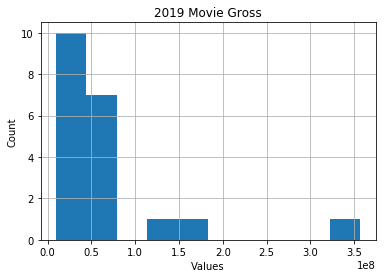

In [130]:
# Plot histograms for all continuous data
df['Gross'].hist()
plt.title("2019 Movie Gross")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()